<a href="https://colab.research.google.com/github/pav16an/Feynn-Labs/blob/main/McDonalds_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
mcdonalds = pd.read_csv('mcdonalds.csv')
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
mcdonalds.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [ ]:
# no of rows and columns
mcdonalds.shape

(1453, 15)

In [ ]:
# Extract the relevant columns (first 11 columns)
MD_x = mcdonalds.iloc[:, 0:11]

# Convert the "Yes" values to 1 and others to 0
MD_x = (MD_x == "Yes").astype(int)

# Calculate the column means and round to 2 decimal places
col_means = MD_x.mean().round(2)

# Display the column means
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [ ]:
# Perform PCA
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(MD_x)

# Get the rotation matrix (components)
rotation_matrix = pca.components_.T

# Create a DataFrame for better readability
rotation_df = pd.DataFrame(rotation_matrix, columns=[f'PC{i+1}' for i in range(rotation_matrix.shape[1])], index=mcdonalds.columns[:11])

# Round the values for display
rotation_df = rotation_df.round(2)

# Print the rotation matrix
print(rotation_df)

             PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10  PC11
yummy      -0.48  0.36 -0.30  0.06 -0.31  0.17 -0.28  0.01  0.57 -0.11  0.05
convenient -0.16  0.02 -0.06 -0.14  0.28 -0.35 -0.06 -0.11 -0.02 -0.67 -0.54
spicy      -0.01  0.02 -0.04  0.20  0.07 -0.36  0.71  0.38  0.40 -0.08  0.14
fattening   0.12 -0.03 -0.32 -0.35 -0.07 -0.41 -0.39  0.59 -0.16 -0.01  0.25
greasy      0.30 -0.06 -0.80  0.25  0.36  0.21  0.04 -0.14 -0.00  0.01  0.00
fast       -0.11 -0.09 -0.06 -0.10  0.11 -0.59 -0.09 -0.63  0.17  0.24  0.34
cheap      -0.34 -0.61 -0.15  0.12 -0.13 -0.10 -0.04  0.14  0.08  0.43 -0.49
tasty      -0.47  0.31 -0.29 -0.00 -0.21 -0.08  0.36 -0.07 -0.64  0.08  0.02
expensive   0.33  0.60  0.02  0.07 -0.00 -0.26 -0.07  0.03  0.07  0.45 -0.49
healthy    -0.21  0.08  0.19  0.76  0.29 -0.18 -0.35  0.18 -0.19 -0.04  0.16
disgusting  0.37 -0.14 -0.09  0.37 -0.73 -0.21 -0.03 -0.17 -0.07 -0.29 -0.04


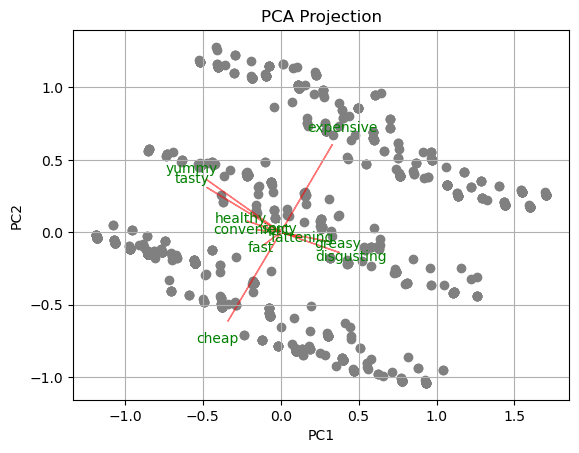

In [ ]:
import matplotlib.pyplot as plt
# Plot the PCA results (first two components)
MD_pca=pca.fit_transform(MD_x)
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Project the axes (loadings)
for i, (x, y) in enumerate(zip(pca.components_[0, :], pca.components_[1, :])):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5)
    plt.text(x * 1.2, y * 1.2, mcdonalds.columns[i], color='g', ha='center', va='center')

plt.title('PCA Projection')
plt.grid()
plt.show()

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x)
np.random.seed(1234)
def perform_kmeans(data, k_range, nrep=10):
    best_models = {}
    for k in k_range:
        best_inertia = np.inf
        best_model = None
        for _ in range(nrep):
            kmeans = KMeans(n_clusters=k, random_state=np.random.randint(10000))
            kmeans.fit(data)
            if kmeans.inertia_ < best_inertia:
                best_inertia = kmeans.inertia_
                best_model = kmeans
        best_models[k] = best_model
    return best_models
k_range = range(2, 9)
MD_km28 = perform_kmeans(MD_x_scaled, k_range)

In [ ]:
def relabel_clusters(models_dict):
    # Implementation depends on your relabeling strategy
    # Placeholder example: return models_dict as is
    return models_dict
MD_km28_relabelled = relabel_clusters(MD_km28)

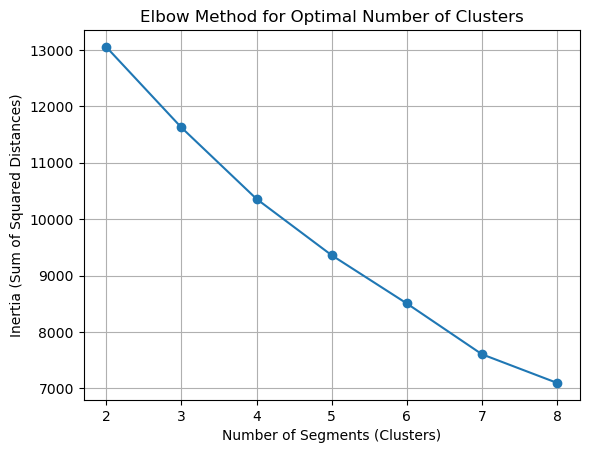

In [ ]:
import matplotlib.pyplot as plt

k_values = list(MD_km28_relabelled.keys())
inertia_values = [model.inertia_ for model in MD_km28_relabelled.values()]


plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()


In [ ]:
import warnings
warnings.filterwarnings('ignore')

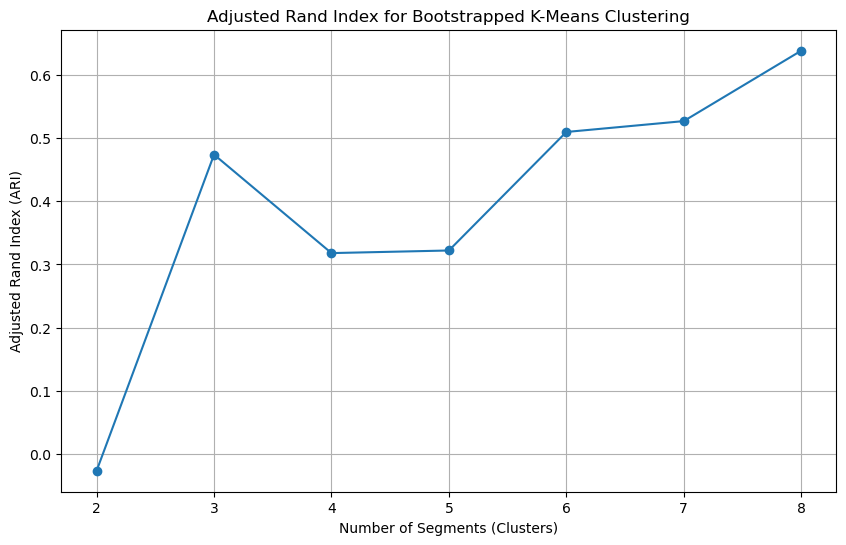

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Function to perform bootstrapping and k-means clustering
def bootstrapped_kmeans(data, k_range, nrep=10, nboot=100):
    results = {k: [] for k in k_range}

    for _ in range(nboot):
        # Create a bootstrap sample
        bootstrap_sample = resample(data, random_state=np.random.randint(10000))

        # Perform k-means clustering on the bootstrap sample
        kmeans_results = perform_kmeans(bootstrap_sample, k_range, nrep)

        # Store the k-means results for each k
        for k in k_range:
            results[k].append(kmeans_results[k])

    return results

# Set seed for reproducibility
np.random.seed(1234)

# Perform bootstrapped k-means clustering for 2 to 8 clusters with 100 bootstrap samples
k_range = range(2, 9)
MD_b28 = bootstrapped_kmeans(MD_x_scaled, k_range, nrep=10, nboot=100)

# Compute Adjusted Rand Index (ARI) for each number of clusters
def compute_ari_for_bootstrap(results, original_data):
    ari_scores = {k: [] for k in results.keys()}

    for k, models in results.items():
        for model in models:
            # Predict the cluster labels for the bootstrap sample
            bootstrap_labels = model.predict(original_data)

            # Compute ARI between bootstrap labels and original labels
            original_labels = KMeans(n_clusters=k, random_state=1234).fit_predict(original_data)
            ari = adjusted_rand_score(original_labels, bootstrap_labels)

            ari_scores[k].append(ari)

    # Average ARI for each k
    avg_ari_scores = {k: np.mean(v) for k, v in ari_scores.items()}
    return avg_ari_scores

# Compute ARI scores
ari_scores = compute_ari_for_bootstrap(MD_b28, MD_x_scaled)

# Plot ARI scores
plt.figure(figsize=(10, 6))
plt.plot(ari_scores.keys(), ari_scores.values(), marker='o')
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Adjusted Rand Index (ARI)')
plt.title('Adjusted Rand Index for Bootstrapped K-Means Clustering')
plt.grid(True)
plt.show()


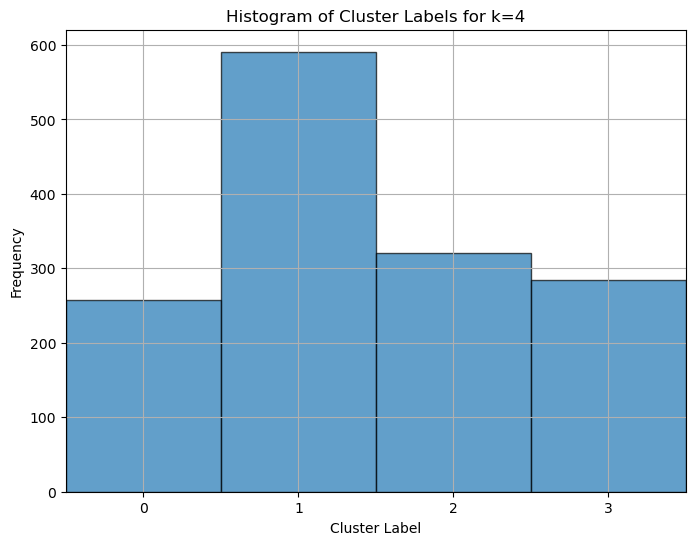

In [ ]:
# Extract cluster labels for k=4
k = 4
best_kmeans_model = MD_km28[k]
cluster_labels = best_kmeans_model.predict(MD_x_scaled)

# Plot histogram of cluster labels
plt.figure(figsize=(8,6))
plt.hist(cluster_labels, bins=np.arange(k+1) - 0.5, edgecolor='black', alpha=0.7)
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')
plt.title(f'Histogram of Cluster Labels for k={k}')
plt.xticks(range(k))
plt.xlim(-0.5, k - 0.5)
plt.grid(True)
plt.show()


In [ ]:
# Extract the k-means model for k=4
k = 4
MD_k4 = MD_km28[k]


In [ ]:
# Function to assess cluster stability
def assess_cluster_stability(data, kmeans_model, nboot=100):
    stability_scores = []

    for _ in range(nboot):
        # Create a bootstrap sample
        bootstrap_sample = resample(data, random_state=np.random.randint(10000))

        # Fit the k-means model on the bootstrap sample
        bootstrap_labels = kmeans_model.fit_predict(bootstrap_sample)

        # Compare with the cluster assignments from the original data
        original_labels = kmeans_model.predict(data)
        ari = adjusted_rand_score(original_labels, bootstrap_labels)
        stability_scores.append(ari)

    # Average stability score
    avg_stability = np.mean(stability_scores)
    return avg_stability

# Assess cluster stability for MD_k4
MD_r4 = assess_cluster_stability(MD_x_scaled, MD_k4, nboot=100)

# Print the average stability score
print("Average stability score for k=4:", MD_r4)


Average stability score for k=4: -0.0008211855087350542


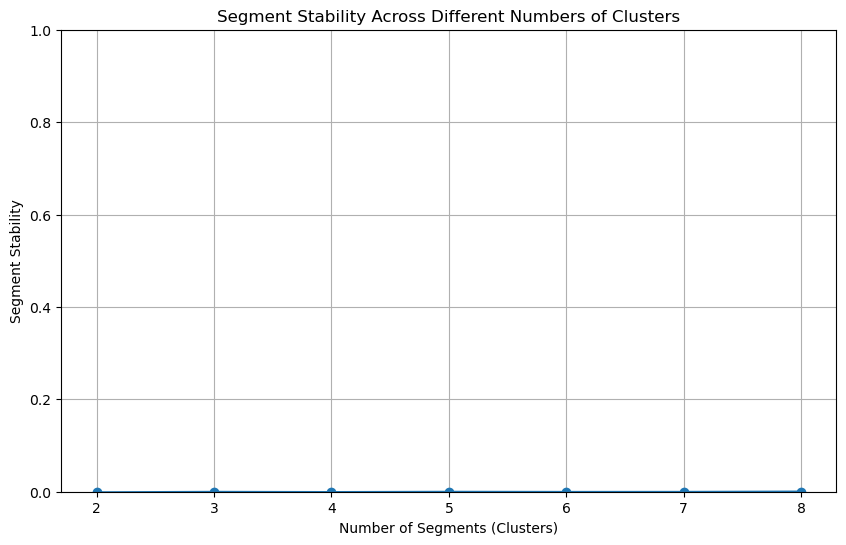

In [ ]:
# Plot stability scores
plt.figure(figsize=(10, 6))
plt.plot(stability_scores.keys(), stability_scores.values(), marker='o')
plt.ylim(0, 1)
plt.xlabel('Number of Segments (Clusters)')
plt.ylabel('Segment Stability')
plt.title('Segment Stability Across Different Numbers of Clusters')
plt.grid(True)
plt.show()

   k        logLik           AIC           BIC
0  2 -10573.399051  21190.798102  21306.988587
1  3   6869.976024 -13673.952049 -13499.666322
2  4   7484.795146 -14881.590292 -14649.209323
3  5  15676.811952 -31243.623904 -30953.147693
4  6  23196.216503 -46260.433005 -45911.861552
5  7  20291.413133 -40428.826265 -40022.159569
6  8  23150.091066 -46124.182133 -45659.420194


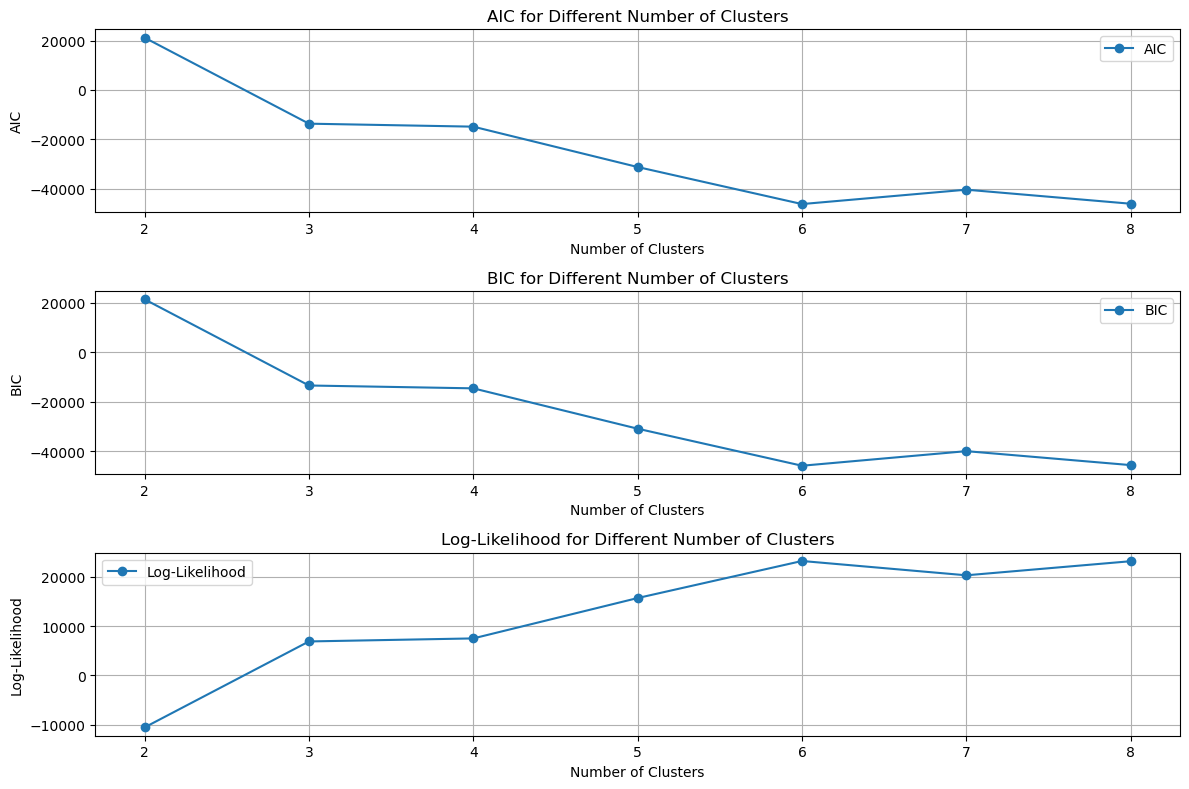

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import log_loss
# Function to fit Gaussian Mixture Models and calculate AIC and BIC
def fit_gmm_and_evaluate(data, k_range):
    results = []

    for k in k_range:
        gmm = GaussianMixture(n_components=k, random_state=1234)
        gmm.fit(data)

        # Compute log likelihood
        log_likelihood = gmm.score(data) * data.shape[0]

        # Compute AIC and BIC
        aic = 2 * gmm.n_components * data.shape[1] - 2 * log_likelihood
        bic = np.log(data.shape[0]) * gmm.n_components * data.shape[1] - 2 * log_likelihood

        results.append({
            'k': k,
            'logLik': log_likelihood,
            'AIC': aic,
            'BIC': bic
        })

    return pd.DataFrame(results)

# Set range of k (number of clusters)
k_range = range(2, 9)

# Fit models and evaluate
results_df = fit_gmm_and_evaluate(MD_x_scaled, k_range)

# Display results
print(results_df)

# Plot results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot AIC
plt.subplot(3, 1, 1)
plt.plot(results_df['k'], results_df['AIC'], marker='o', label='AIC')
plt.xlabel('Number of Clusters')
plt.ylabel('AIC')
plt.title('AIC for Different Number of Clusters')
plt.legend()
plt.grid(True)

# Plot BIC
plt.subplot(3, 1, 2)
plt.plot(results_df['k'], results_df['BIC'], marker='o', label='BIC')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC')
plt.title('BIC for Different Number of Clusters')
plt.legend()
plt.grid(True)

# Plot log likelihood
plt.subplot(3, 1, 3)
plt.plot(results_df['k'], results_df['logLik'], marker='o', label='Log-Likelihood')
plt.xlabel('Number of Clusters')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood for Different Number of Clusters')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
# Predict cluster assignments
MD_m4 = MD_km28[k]
kmeans_labels = MD_k4.predict(MD_x_scaled)
mixture_labels = MD_m4.predict(MD_x_scaled)  # Replace with actual method to get labels from MD_m4

# Create a confusion matrix to compare cluster assignments
conf_matrix = confusion_matrix(kmeans_labels, mixture_labels)
conf_matrix_df = pd.DataFrame(conf_matrix, index=range(1, k+1), columns=range(1, k+1))

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_df)

Confusion Matrix:
     1    2   3    4    5   6   7    8
1    0    0  15    0    2  41  82    0
2    1    0  67   16  110  67   0    0
3    0  374   0  191   15   1   3  125
4  162   11  46   39   49   6   0   30
5    0    0   0    0    0   0   0    0
6    0    0   0    0    0   0   0    0
7    0    0   0    0    0   0   0    0
8    0    0   0    0    0   0   0    0


In [ ]:
# Using Mixtures of Regression Models
print("Original 'Like' values:")
print(mcdonalds['Like'].value_counts().sort_index())

# Convert 'Like' to numeric and reverse the scale
mcdonalds['Like'] = pd.to_numeric(mcdonalds['Like'], errors='coerce')
mcdonalds['Like_n'] = 6 - mcdonalds['Like']

# Print the frequency table for the reversed 'Like' values
like_n_counts = mcdonalds['Like_n'].value_counts().sort_index()
print("\nReversed 'Like' values:")
print(like_n_counts)

Original 'Like' values:
Like
+1              152
+2              187
+3              229
+4              160
-1               58
-2               59
-3               73
-4               71
0               169
I hate it!-5    152
I love it!+5    143
Name: count, dtype: int64

Reversed 'Like' values:
Like_n
2.0     160
3.0     229
4.0     187
5.0     152
6.0     169
7.0      58
8.0      59
9.0      73
10.0     71
Name: count, dtype: int64


In [ ]:
columns = mcdonalds.columns[:11]

# Create the formula string
formula = "Like_n ~ " + " + ".join(columns)

print("Formula string:")
print(formula)

Formula string:
Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [ ]:
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(MD_x_scaled)

# Predict cluster assignments
clusters = gmm.predict(MD_x_scaled)

# Get cluster sizes
cluster_sizes = pd.Series(clusters).value_counts().sort_index()

# Print the results
print("Cluster sizes:")
print(cluster_sizes)

# Check convergence status
print(f"Converged: {gmm.converged_}")


Cluster sizes:
0     393
1    1060
Name: count, dtype: int64
Converged: True


In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram



# Transpose the data matrix
MD_x_t = MD_x.T

# Compute the distance matrix
dist_matrix = pdist(MD_x_t, metric='euclidean')

# Perform hierarchical clustering
linkage_matrix = linkage(dist_matrix, method='ward')


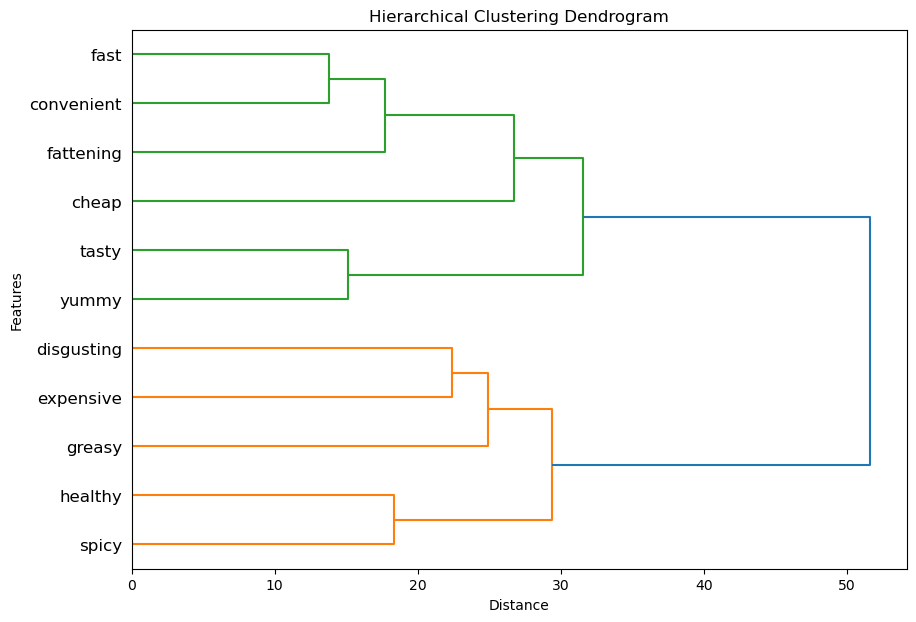

In [ ]:
# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=MD_x.columns, orientation='right')
plt.xlabel('Distance')
plt.ylabel('Features')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list

# Get the order of features
order = leaves_list(linkage_matrix)

# Reorder columns according to the hierarchical clustering order
MD_x_reordered = MD_x.iloc[:, order]


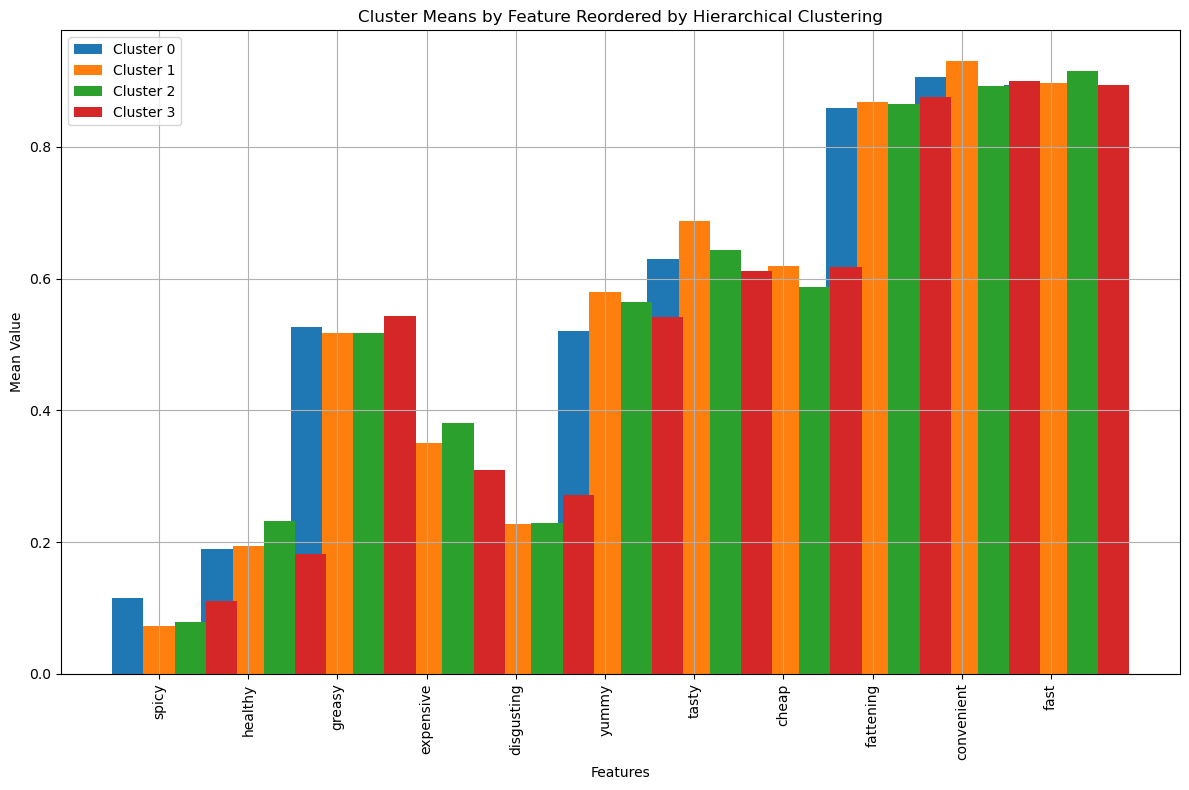

In [ ]:
np.random.seed(1234)
clusters = np.random.randint(0, 4, size=MD_x.shape[0])  # Example: 4 clusters

# Create a DataFrame for clusters and their means
cluster_means = MD_x.groupby(clusters).mean()

# Reorder cluster means according to hierarchical clustering order
cluster_means_reordered = cluster_means.iloc[:, order]

# Plot bar chart
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(cluster_means_reordered.columns))

# Plot each cluster's mean
for i, col in enumerate(cluster_means_reordered.index):
    plt.bar(index + i * bar_width, cluster_means_reordered.loc[col, :], bar_width, label=f'Cluster {col}')

plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Cluster Means by Feature Reordered by Hierarchical Clustering')
plt.xticks(index + bar_width, cluster_means_reordered.columns, rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


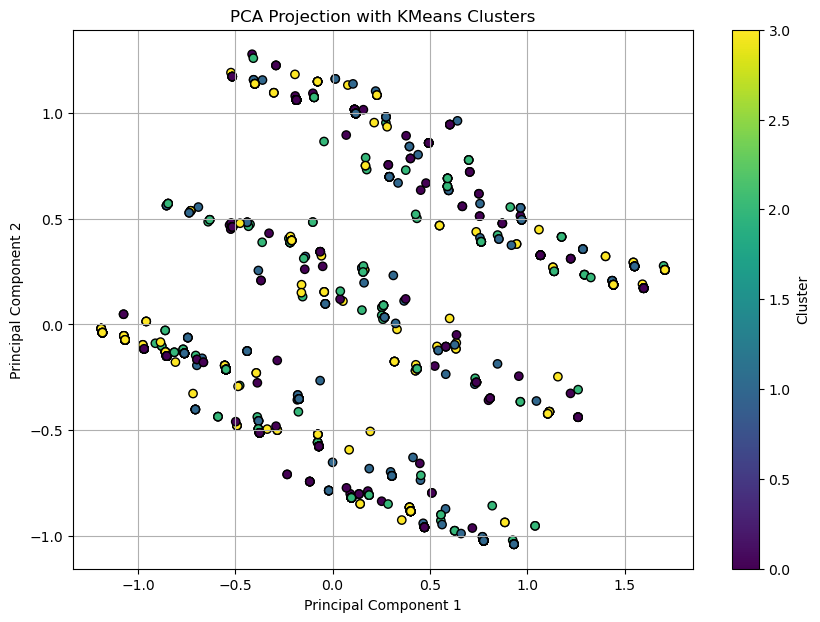

In [ ]:
# Plot the PCA results with clusters
plt.figure(figsize=(10, 7))

# Scatter plot of the first two principal components
scatter = plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k')

# Add a color bar
plt.colorbar(scatter, label='Cluster')

# Set plot labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection with KMeans Clusters')

plt.grid(True)
plt.show()


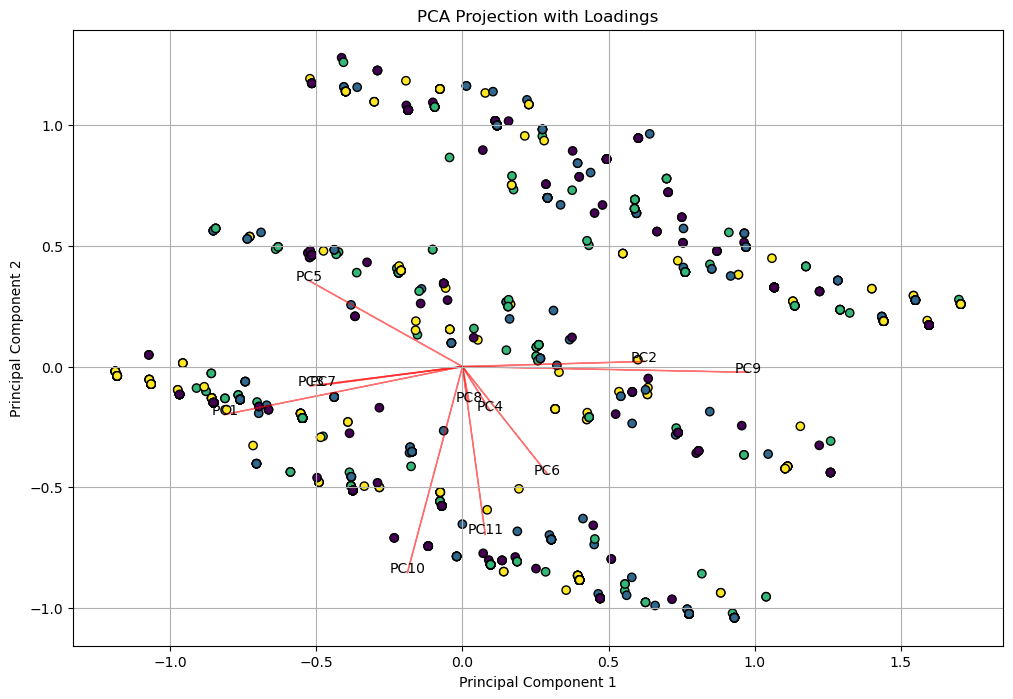

In [ ]:
# Get the PCA components (loadings)
components = pca.components_

# Plot the PCA results with cluster centroids
plt.figure(figsize=(12, 8))

# Scatter plot
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=clusters, cmap='viridis', edgecolor='k')

# Add the PCA loadings (principal component vectors) to the plot
for i in range(components.shape[0]):
    plt.arrow(0, 0, components[i, 0]*max(MD_pca[:, 0]), components[i, 1]*max(MD_pca[:, 1]),
              color='red', alpha=0.5)
    plt.text(components[i, 0]*max(MD_pca[:, 0]), components[i, 1]*max(MD_pca[:, 1]),
             f'PC{i+1}', color='black', ha='center')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection with Loadings')
plt.grid(True)
plt.show()


In [ ]:
# Convert VisitFrequency to numeric
mcdonalds['VisitFrequency'] = pd.to_numeric(mcdonalds['VisitFrequency'], errors='coerce')
k4=mcdonalds['Cluster']  # Replace with actual cluster assignments


In [ ]:
# Calculate the mean VisitFrequency for each cluster
visit_means = mcdonalds.groupby('Cluster')['VisitFrequency'].mean()
print(visit_means)


Cluster
0   NaN
1   NaN
2   NaN
3   NaN
Name: VisitFrequency, dtype: float64


In [ ]:
mcdonalds['Like_n'] = pd.to_numeric(mcdonalds['Like_n'], errors='coerce')
k4=mcdonalds['Cluster']


In [ ]:
like_means = mcdonalds.groupby('Cluster')['Like_n'].mean()
print(like_means)


Cluster
0    3.646962
1    7.711538
2    6.893401
3    5.980000
Name: Like_n, dtype: float64
